In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from powerbiclient import Report, models, authentication
from powerbiclient.authentication import InteractiveLoginAuthentication, DeviceCodeLoginAuthentication
from powerbiclient import QuickVisualize, get_dataset_config

In [2]:

# Load the JSON file into a DataFrame
df = pd.read_json('stock_price.json')


In [3]:
df.head()

,symbol,identifier,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,yearHigh,yearLow,totalTradedVolume,totalTradedValue,lastUpdateTime,perChange365d,perChange30d
0,NIFTY 50,NIFTY 50,19729.35,19729.35,19615.95,19680.60,19672.35,8.25,0.04,19991.85,16747.70,369587576,2.965939e+11,25-Jul-2023 15:40:57,17.66,5.39
1,HINDALCO,HINDALCOEQN,436.15,450.50,435.00,450.25,432.95,17.30,4.00,504.00,358.80,8482522,3.765900e+09,25-Jul-2023 15:41:40,13.56,5.99
2,JSWSTEEL,JSWSTEELEQN,778.00,805.50,777.00,800.00,775.65,24.35,3.14,823.35,573.50,4849500,3.862190e+09,25-Jul-2023 15:41:50,33.17,3.90
3,TATASTEEL,TATASTEELEQN,115.00,119.90,114.35,119.10,115.50,3.60,3.12,124.30,93.36,88022886,1.041047e+10,25-Jul-2023 15:41:55,-87.66,5.38
4,ULTRACEMCO,ULTRACEMCOEQN,8244.70,8415.00,8244.70,8400.50,8219.85,180.65,2.20,8499.00,6005.00,583137,4.887055e+09,25-Jul-2023 15:41:53,27.27,1.73


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             51 non-null     object 
 1   identifier         51 non-null     object 
 2   open               51 non-null     float64
 3   dayHigh            51 non-null     float64
 4   dayLow             51 non-null     float64
 5   lastPrice          51 non-null     float64
 6   previousClose      51 non-null     float64
 7   change             51 non-null     float64
 8   pChange            51 non-null     float64
 9   yearHigh           51 non-null     float64
 10  yearLow            51 non-null     float64
 11  totalTradedVolume  51 non-null     int64  
 12  totalTradedValue   51 non-null     float64
 13  lastUpdateTime     51 non-null     object 
 14  perChange365d      51 non-null     object 
 15  perChange30d       51 non-null     float64
dtypes: float64(11), int64(1), ob

In [5]:
df.shape

(51, 16)

In [6]:
df.describe()

,open,dayHigh,dayLow,lastPrice,previousClose,change,pChange,yearHigh,yearLow,totalTradedVolume,totalTradedValue,perChange30d
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000
mean,2972.467647,2989.837255,2938.405882,2962.331373,2959.838235,2.493137,0.223333,3134.737255,2308.586471,1.449363e+07,1.163113e+10,4.695882
std,4354.478750,4363.446484,4299.832792,4321.045085,4320.858472,40.945112,1.434221,4423.144893,3491.244681,5.270195e+07,4.148240e+10,4.485372
min,115.000000,119.900000,114.350000,119.100000,115.500000,-148.700000,-4.200000,124.300000,93.360000,6.252600e+04,6.330555e+08,-6.540000
25%,695.400000,706.000000,691.575000,700.050000,694.225000,-6.575000,-0.615000,815.175000,536.425000,8.582030e+05,1.958010e+09,2.180000
50%,1437.000000,1446.000000,1411.400000,1418.000000,1435.700000,1.700000,0.040000,1594.800000,1054.000000,2.506656e+06,3.112878e+09,5.380000
75%,3361.525000,3385.900000,3331.375000,3358.500000,3351.300000,15.150000,0.975000,3736.275000,2707.925000,7.909320e+06,6.921605e+09,7.715000
max,23140.000000,23140.000000,22675.250000,22750.000000,22820.100000,180.650000,4.000000,23395.350000,17880.000000,3.695876e+08,2.965939e+11,12.880000


In [8]:
auth = InteractiveLoginAuthentication()

A local browser window will open for interactive sign in.

Interactive authentication successfully completed.
You are now logged in.

The result should be passed only to trusted code in your notebook.


In [9]:
PBI_visualize = QuickVisualize(get_dataset_config(df),auth)

In [13]:
PBI_visualize

QuickVisualize()

<Figure size 720x720 with 0 Axes>

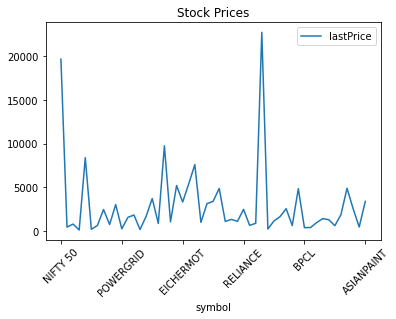

In [67]:
# Line chart with stock price and symbol
plt.figure(figsize=(10, 10))
df.plot(x='symbol', y='lastPrice', title='Stock Prices')
plt.xticks(rotation=45)
plt.show()


<Figure size 720x1152 with 0 Axes>

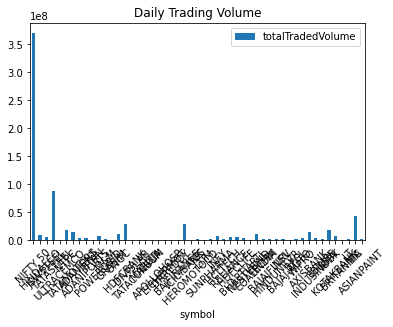

In [68]:
#Bar Plot of Daily Trading Volume, with Company Name and totalTradedVolume with figure size 10,6
plt.figure(figsize=(10, 16))
df.plot(x='symbol', y='totalTradedVolume', kind='bar', title='Daily Trading Volume')
plt.xticks(rotation=45)
plt.show()

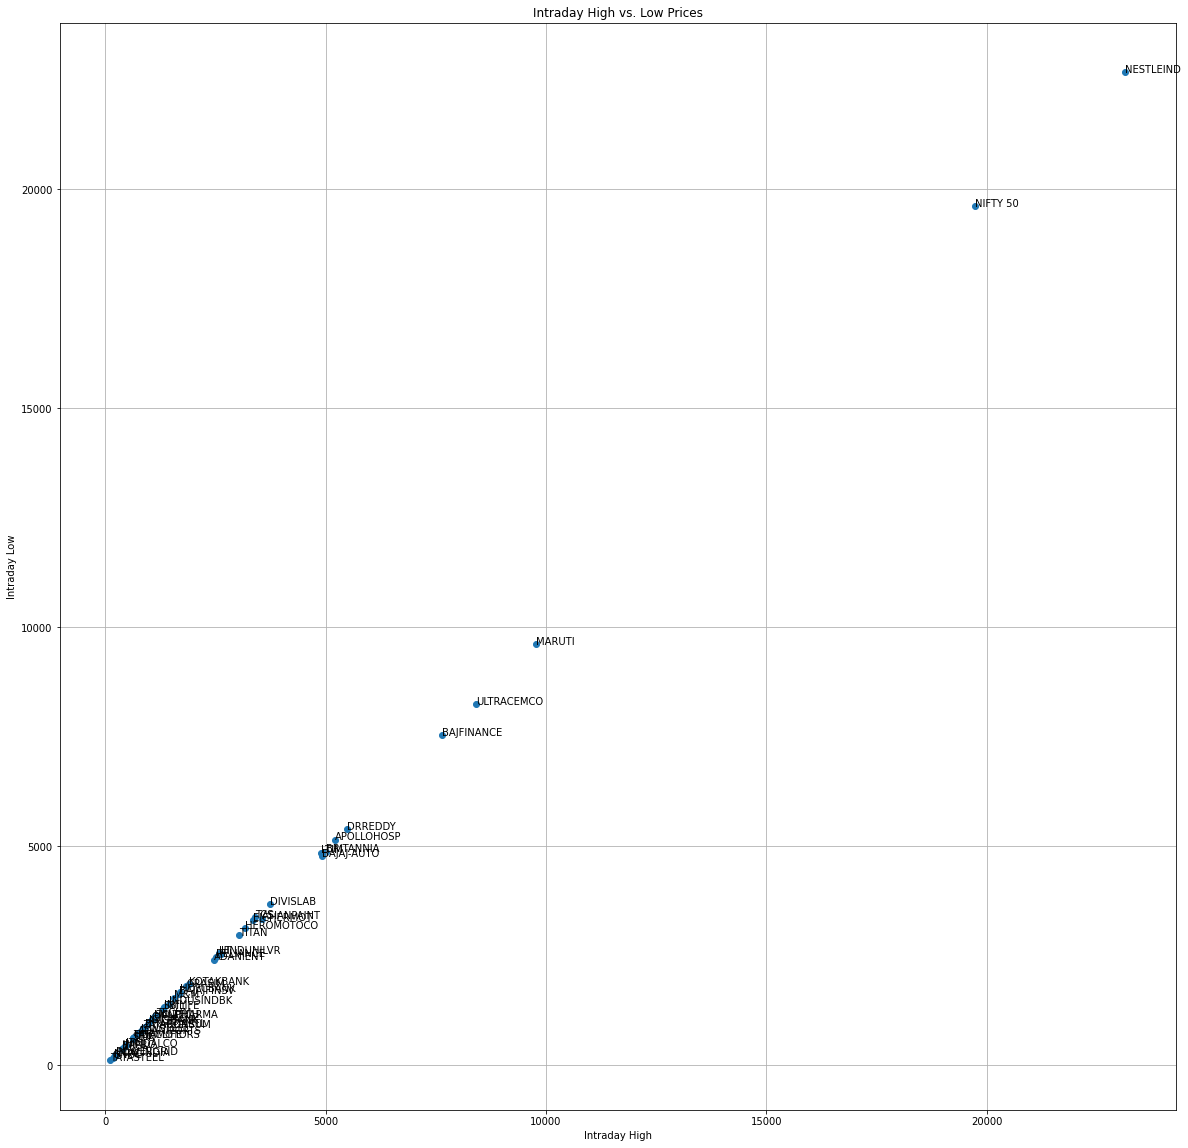

In [69]:
plt.figure(figsize=(20,20))
plt.scatter(df["dayHigh"], df["dayLow"])
for i, stock in enumerate(df["symbol"]):
    plt.text(df["dayHigh"][i], df["dayLow"][i], stock)

plt.xlabel("Intraday High")
plt.ylabel("Intraday Low")
plt.title("Intraday High vs. Low Prices")
plt.grid(True)
plt.show()